<a href="https://colab.research.google.com/github/syahputra21/Datamining_Prediksi-Harga-Smartphone/blob/main/Datamining_Prediksi_visualisasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
!pip install xgboost
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Ganti path sesuai dengan lokasi dataset kamu
file_path = '/content/drive/MyDrive/Datming/Mobile Price Prediction Datatset.csv'
df = pd.read_csv(file_path)

# Tampilkan kolom
print("Kolom:", df.columns.tolist())
df.head()

Kolom: ['Unnamed: 0', 'Brand me', 'Ratings', 'RAM', 'ROM', 'Mobile_Size', 'Primary_Cam', 'Selfi_Cam', 'Battery_Power', 'Price']


,Unnamed: 0,Brand me,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
0,0,"LG V30+ (Black, 128 )",4.3,4.0,128.0,6.00,48,13.0,4000,24999
1,1,I Kall K11,3.4,6.0,64.0,4.50,48,12.0,4000,15999
2,2,Nokia 105 ss,4.3,4.0,4.0,4.50,64,16.0,4000,15000
3,3,"Samsung Galaxy A50 (White, 64 )",4.4,6.0,64.0,6.40,48,15.0,3800,18999
4,4,"POCO F1 (Steel Blue, 128 )",4.5,6.0,128.0,6.18,35,15.0,3800,18999


In [5]:
# Daftar kolom fitur dan target
features = ['Ratings', 'RAM', 'ROM', 'Selfi_Cam', 'Battery_Power' ]
target = 'Price'

# Pastikan semua kolom tersedia
features = [f for f in features if f in df.columns]
if target not in df.columns:
    raise ValueError("Kolom 'Price' tidak ditemukan.")

# Konversi ke float jika perlu (misal jika pakai koma)
df[features] = df[features].replace(',', '.', regex=True).astype(float)
df[target] = df[target].replace(',', '.', regex=True).astype(float)

# Pisahkan X dan y
X = df[features]
y = df[target]

# Split data (tanpa scaling karena model tree-based)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Model dan training
rf_model = RandomForestRegressor(n_estimators=30, random_state=42)
rf_model.fit(X_train, y_train)

# Prediksi
rf_pred = rf_model.predict(X_test)

# Evaluasi
mae_rf = mean_absolute_error(y_test, rf_pred)
mse_rf = mean_squared_error(y_test, rf_pred)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, rf_pred)

print("Random Forest Regressor:")
print(f"MAE  : {mae_rf:.2f}")
print(f"MSE  : {mse_rf:.2f}")
print(f"RMSE : {rmse_rf:.2f}")
print(f"R²   : {r2_rf:.4f}")

Random Forest Regressor:
MAE  : 4019.81
MSE  : 251970762.21
RMSE : 15873.59
R²   : 0.8916


In [7]:
xgb_model = XGBRegressor(
    n_estimators=50,
    learning_rate=0.5,
    max_depth=7,
    subsample=0.9,
    colsample_bytree=0.7,
    random_state=50
)

xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

mae_xgb = mean_absolute_error(y_test, xgb_pred)
mse_xgb = mean_squared_error(y_test, xgb_pred)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, xgb_pred)

print("🚀 XGBoost Regressor:")
print(f"MAE  : {mae_xgb:.2f}")
print(f"MSE  : {mse_xgb:.2f}")
print(f"RMSE : {rmse_xgb:.2f}")
print(f"R²   : {r2_xgb:.4f}")

🚀 XGBoost Regressor:
MAE  : 2932.82
MSE  : 97805561.57
RMSE : 9889.67
R²   : 0.9579


In [8]:
!pip install tabulate

from tabulate import tabulate

hasil = pd.DataFrame({
    'Model': ['Random Forest', 'XGBoost'],
    'MAE': [mae_rf, mae_xgb],
    'MSE': [mse_rf, mse_xgb],
    'RMSE': [rmse_rf, rmse_xgb],
    'R2 Score': [r2_rf, r2_xgb]
})

print("📊 Perbandingan Hasil Evaluasi:")
print(tabulate(hasil, headers='keys', tablefmt='fancy_grid', showindex=False))

📊 Perbandingan Hasil Evaluasi:
╒═══════════════╤═════════╤═════════════╤══════════╤════════════╕
│ Model         │     MAE │         MSE │     RMSE │   R2 Score │
╞═══════════════╪═════════╪═════════════╪══════════╪════════════╡
│ Random Forest │ 4019.81 │ 2.51971e+08 │ 15873.6  │   0.891624 │
├───────────────┼─────────┼─────────────┼──────────┼────────────┤
│ XGBoost       │ 2932.82 │ 9.78056e+07 │  9889.67 │   0.957933 │
╘═══════════════╧═════════╧═════════════╧══════════╧════════════╛


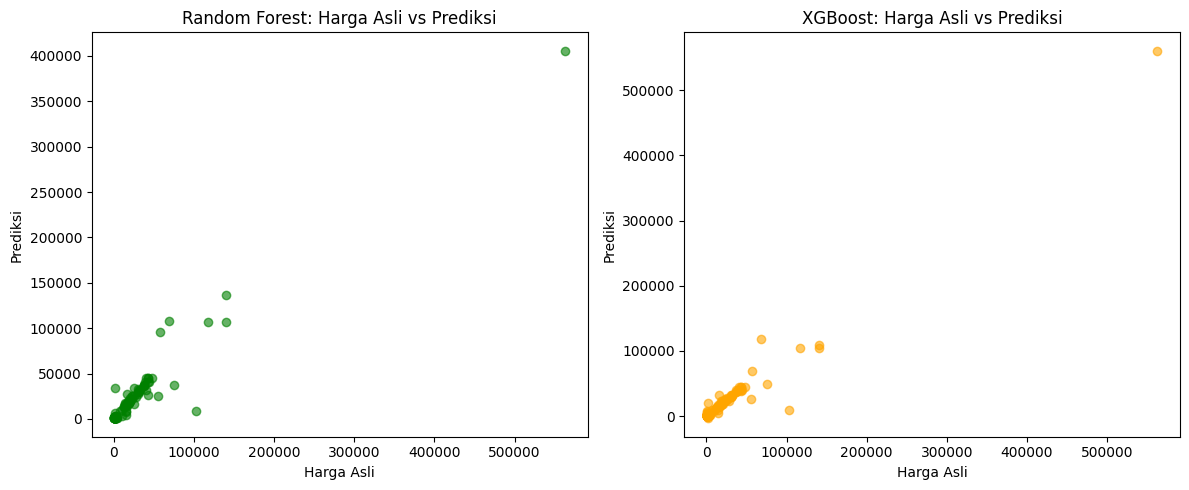

In [9]:
plt.figure(figsize=(12,5))

# Random Forest
plt.subplot(1,2,1)
plt.scatter(y_test, rf_pred, alpha=0.6, color='green')
plt.xlabel("Harga Asli")
plt.ylabel("Prediksi")
plt.title("Random Forest: Harga Asli vs Prediksi")

# XGBoost
plt.subplot(1,2,2)
plt.scatter(y_test, xgb_pred, alpha=0.6, color='orange')
plt.xlabel("Harga Asli")
plt.ylabel("Prediksi")
plt.title("XGBoost: Harga Asli vs Prediksi")

plt.tight_layout()
plt.show()

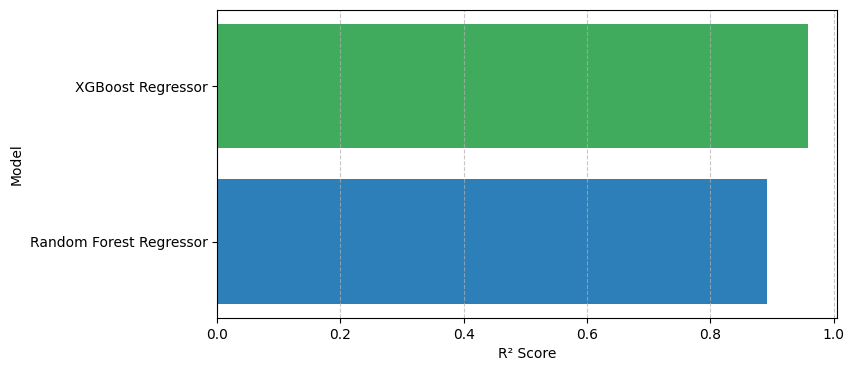

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.barh(['Random Forest Regressor', 'XGBoost Regressor'], [r2_rf, r2_xgb], color=['#2c7fb8', '#41ab5d'])
plt.xlabel("R² Score")
plt.ylabel("Model")
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.show()

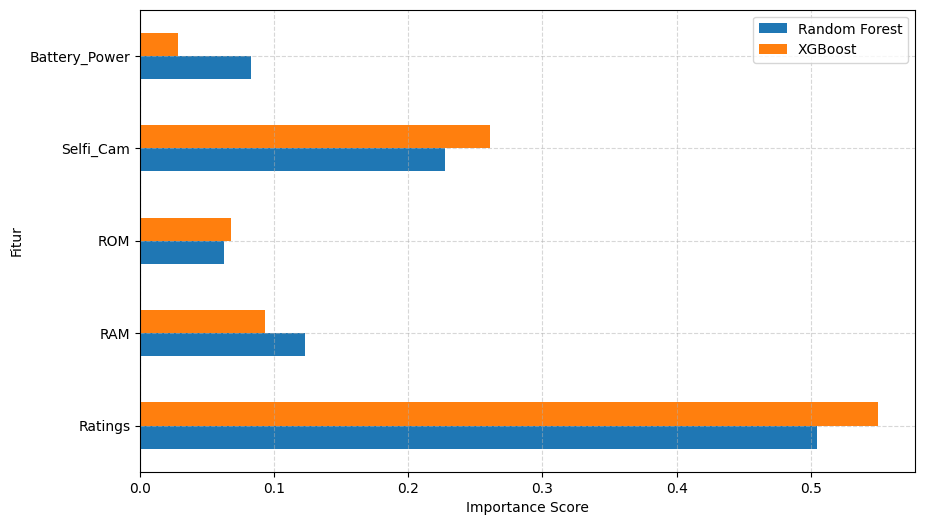

In [11]:
rf_importance = rf_model.feature_importances_
xgb_importance = xgb_model.feature_importances_

importance_df = pd.DataFrame({
    'Fitur': X.columns,
    'Random Forest': rf_importance,
    'XGBoost': xgb_importance
}).set_index('Fitur')

importance_df.plot(kind='barh', figsize=(10,6))
plt.xlabel("Importance Score")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

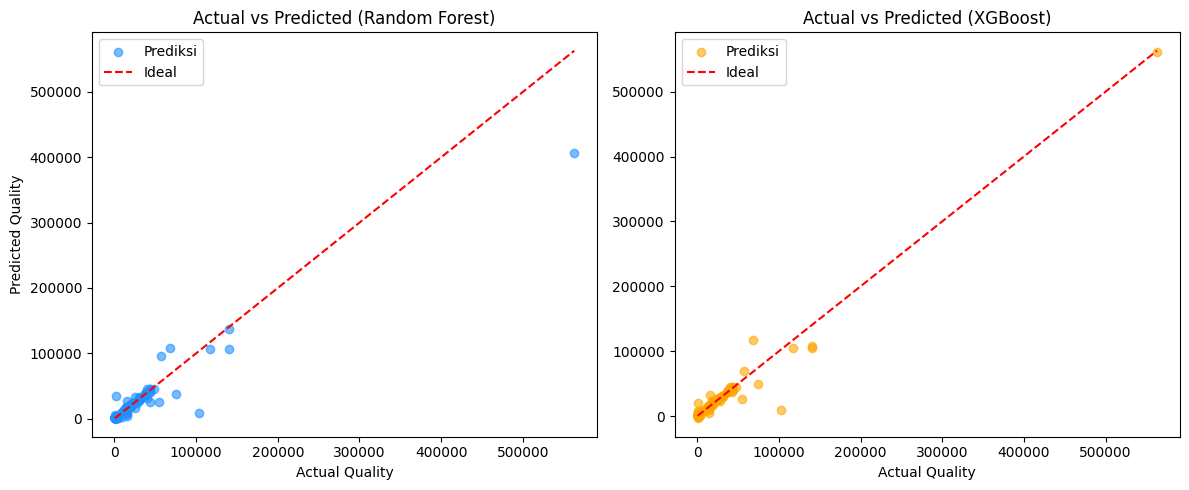

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))

axes[0].scatter(y_test, rf_pred, alpha=0.6, label='Prediksi', color='dodgerblue')
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal')
axes[0].set_title("Actual vs Predicted (Random Forest)")
axes[0].set_xlabel("Actual Quality")
axes[0].set_ylabel("Predicted Quality")
axes[0].legend()

axes[1].scatter(y_test, xgb_pred, alpha=0.6, label='Prediksi', color='orange')
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal')
axes[1].set_title("Actual vs Predicted (XGBoost)")
axes[1].set_xlabel("Actual Quality")
axes[1].legend()
plt.tight_layout()
plt.show()

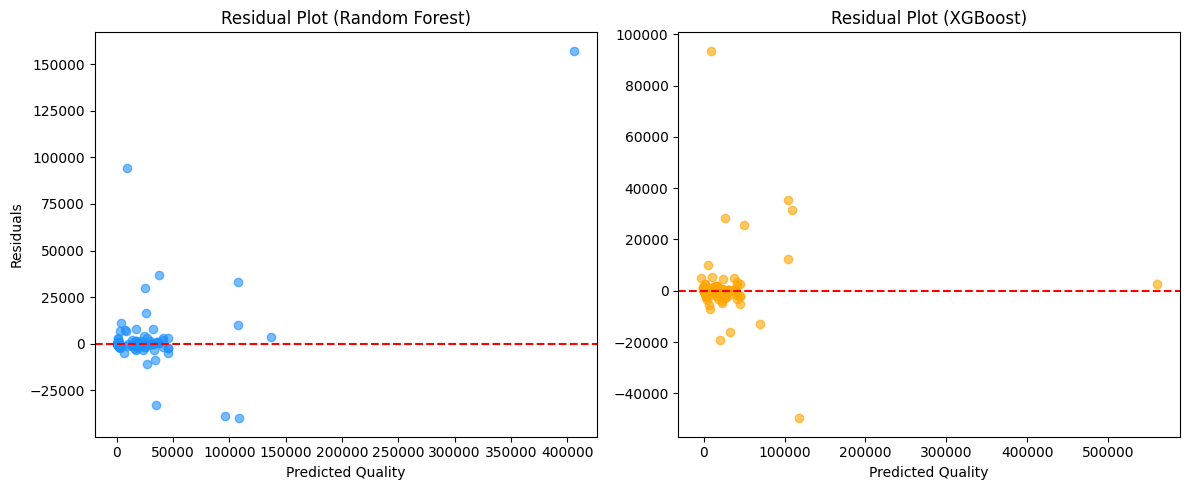

In [13]:
rf_residuals = y_test - rf_pred
xgb_residuals = y_test - xgb_pred

fig, axes = plt.subplots(1, 2, figsize=(12,5))

axes[0].scatter(rf_pred, rf_residuals, alpha=0.6, color='dodgerblue')
axes[0].axhline(0, color='red', linestyle='--')
axes[0].set_title("Residual Plot (Random Forest)")
axes[0].set_xlabel("Predicted Quality")
axes[0].set_ylabel("Residuals")

axes[1].scatter(xgb_pred, xgb_residuals, alpha=0.6, color='orange')
axes[1].axhline(0, color='red', linestyle='--')
axes[1].set_title("Residual Plot (XGBoost)")
axes[1].set_xlabel("Predicted Quality")

plt.tight_layout()
plt.show()

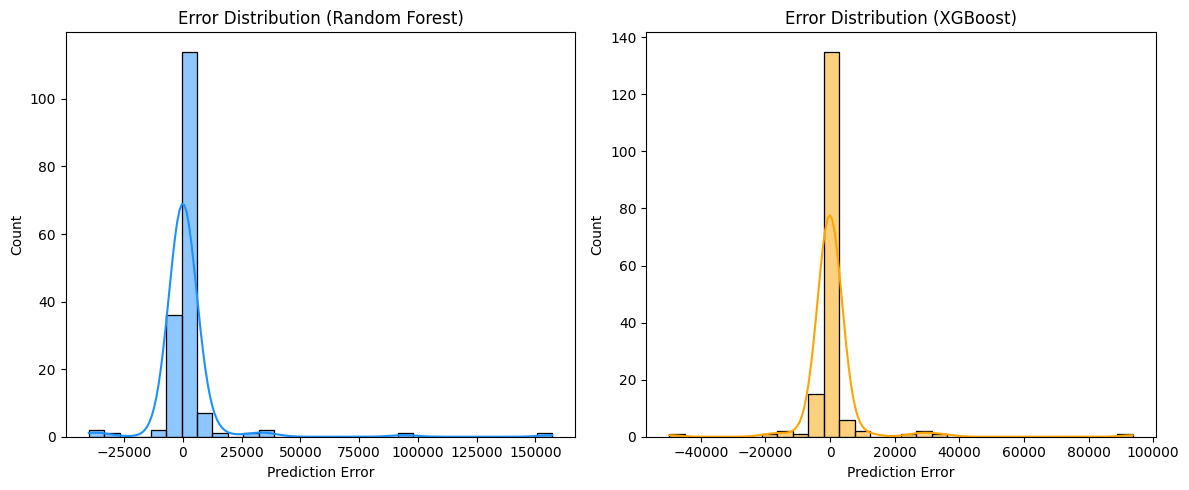

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.histplot(rf_residuals, kde=True, bins=30, ax=axes[0], color='dodgerblue')
axes[0].set_title("Error Distribution (Random Forest)")
axes[0].set_xlabel("Prediction Error")

sns.histplot(xgb_residuals, kde=True, bins=30, ax=axes[1], color='orange')
axes[1].set_title("Error Distribution (XGBoost)")
axes[1].set_xlabel("Prediction Error")

plt.tight_layout()
plt.show()

In [15]:
top10 = pd.DataFrame({
    'Actual Quality': y_test[:10].values,
    'Predicted (Random Forest)': rf_pred[:10],
    'Predicted (XGBoost)': xgb_pred[:10],
})

top10['Error (Random Forest)'] = top10['Actual Quality'] - top10['Predicted (Random Forest)']
top10['Error (XGBoost)'] = top10['Actual Quality'] - top10['Predicted (XGBoost)']
top10['RF Correct'] = top10['Error (Random Forest)'].abs().round(0).astype(int).apply(lambda x: 'Benar' if x == 0 else 'Salah')
top10['XGB Correct'] = top10['Error (XGBoost)'].abs().round(0).astype(int).apply(lambda x: 'Benar' if x == 0 else 'Salah')

from tabulate import tabulate
print(tabulate(top10, headers='keys', tablefmt='fancy_grid', showindex=False))

╒══════════════════╤═════════════════════════════╤═══════════════════════╤═════════════════════════╤═══════════════════╤══════════════╤═══════════════╕
│   Actual Quality │   Predicted (Random Forest) │   Predicted (XGBoost) │   Error (Random Forest) │   Error (XGBoost) │ RF Correct   │ XGB Correct   │
╞══════════════════╪═════════════════════════════╪═══════════════════════╪═════════════════════════╪═══════════════════╪══════════════╪═══════════════╡
│            37990 │                   37723.3   │             37926.9   │               266.667   │          63.0625  │ Salah        │ Salah         │
├──────────────────┼─────────────────────────────┼───────────────────────┼─────────────────────────┼───────────────────┼──────────────┼───────────────┤
│             1695 │                    1688.11  │              1504.36  │                 6.89108 │         190.643   │ Salah        │ Salah         │
├──────────────────┼─────────────────────────────┼───────────────────────┼──────────────